In [5]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

from dataloader.co3d_utils import *

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [26]:
category_imgs, category_masks, category_c2ws, category_instrinsics = read_category_data("D:/CO3D/teddybear", normalization=False)


print(len(category_c2ws))

37356


In [20]:
c2w = seq_c2ws[0]
camera_center = c2w[:3, 3]
print(camera_center)

[-0.32220077  1.4833846  -6.38463332]


In [28]:
norms = []

for c2w in category_c2ws:
    camera_center = c2w[:3, 3]
    norms.append(np.linalg.norm(camera_center))

norms = np.array(norms)
avg_norm = np.average(norms)

In [31]:
np.min(norms)

2.6158171622992317

In [8]:
ply_file = o3d.io.read_point_cloud("./test_dataset/38_1655_5016/pointcloud.ply")

In [9]:
print(ply_file)

PointCloud with 107456 points.


In [10]:
ply_arr = np.asarray(ply_file.points)

In [11]:
ply_arr[0]

array([-0.56043911, -1.32668626, -1.15903521])

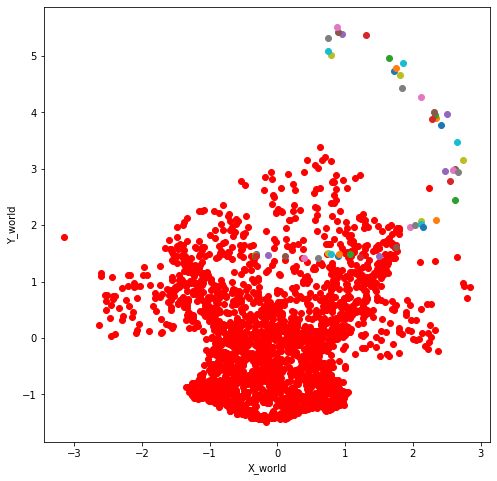

In [19]:
fig = plt.figure(figsize=(8, 8))

# ax = plt.axes(projection='3d')
ax = plt.axes()

ax.set_xlabel("X_world")
ax.set_ylabel("Y_world")
# ax.set_zlabel("Z_world")

for (x, y, z) in ply_arr[::50]:
    # ax.scatter3D(x, y, z, color='r')
    ax.scatter(x, y, color='r')

for seq_c2w in seq_c2ws[:50]:
    # 카메라 위치
    x, y, z = seq_c2w[:3, 3]

    # # 카메라의 +x, +y, +z축
    # xx, xy, xz = seq_c2w[:3, 0]
    # yx, yy, yz = seq_c2w[:3, 1]
    # zx, zy, zz = seq_c2w[:3, 2]
    
    # # 카메라의 x축 그리기
    # xs = [x, x+xx]
    # ys = [y, y+xy]
    # zs = [z, z+xz]
    # a = Arrow3D(xs, ys, zs, mutation_scale=15, 
    #             lw=0.5, arrowstyle="-|>", color="r")
    # ax.add_artist(a)

    # # 카메라의 y축 그리기
    # xs = [x, x+yx]
    # ys = [y, y+yy]
    # zs = [z, z+yz]
    # a = Arrow3D(xs, ys, zs, mutation_scale=15, 
    #             lw=0.5, arrowstyle="-|>", color="g")
    # ax.add_artist(a)

    # # 카메라의 z축 그리기
    # xs = [x, x+zx]
    # ys = [y, y+zy]
    # zs = [z, z+zz]
    # a = Arrow3D(xs, ys, zs, mutation_scale=15, 
    #             lw=0.5, arrowstyle="-|>", color="b")
    # ax.add_artist(a)

    # ax.scatter3D(x, y, z, cmap='Greens')
    ax.scatter(x, y, cmap='Greens')

In [ ]:
o3d.visualization.draw_geometries([ply_file])